In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import lightgbm as lgb
import xgboost as xgb

#### Load the Titanic Dataset

In [3]:
df_train=pd.read_csv("Titanic_train.csv") ## Loading training data
df_test=pd.read_csv("Titanic_test.csv") ## Loading testing data

In [5]:
df_train.head() # Training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head() ## testing data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Expolratory Data Analysis (EDA)

 - check for missing values

In [9]:
## Missing values in Training data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
## Missing values in Testing data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Visualization

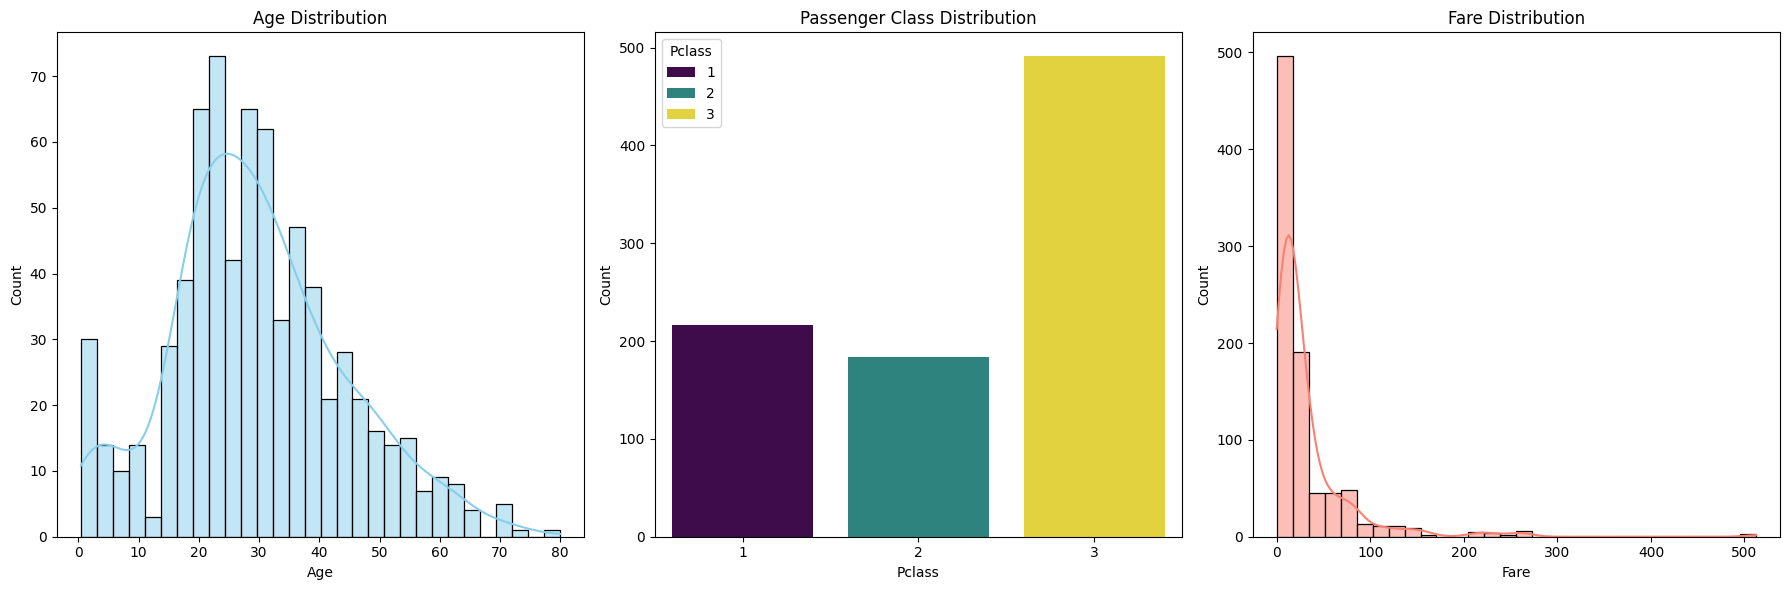

In [22]:
fig, axes = plt.subplots(1,3,figsize=(18,6))

sns.histplot(df_train['Age'],kde=True,bins=30,ax=axes[0],color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

sns.countplot(x='Pclass', data=df_train,ax=axes[1],hue='Pclass', palette='viridis')
axes[1].set_title('Passenger Class Distribution')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Count')


sns.histplot(df_train['Fare'],kde=True,bins=30,ax=axes[2],color='salmon')
axes[2].set_title('Fare Distribution')
axes[2].set_xlabel('Fare')

plt.tight_layout()
plt.show()

- Visualizing relationships between features and survival using scatter plots and bar plots.

Text(0, 0.5, 'Survival Rate')

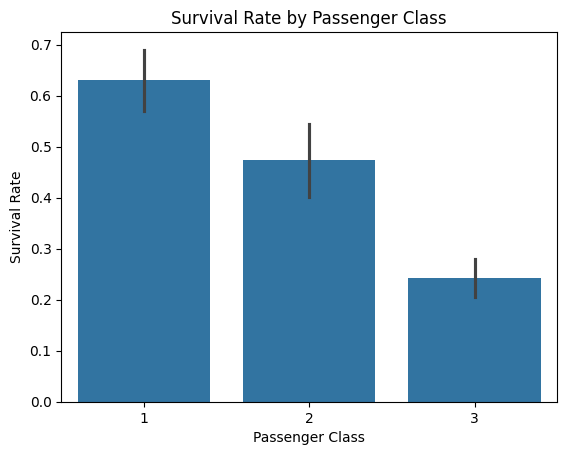

In [27]:
sns.barplot(x='Pclass',y='Survived',data=df_train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

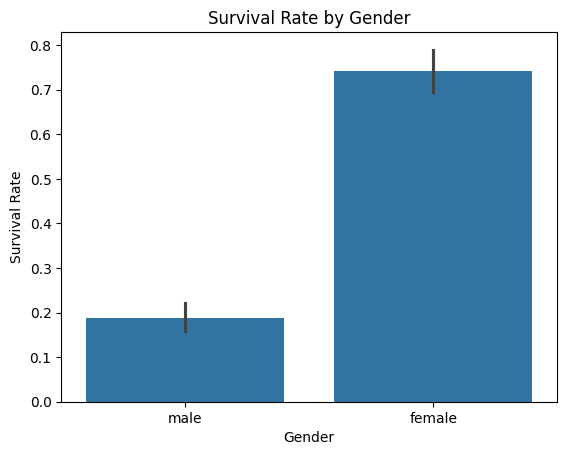

In [28]:
sns.barplot(x='Sex',y='Survived',data=df_train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

### Data Preprocessing

- Impute missing values

In [29]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [30]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [31]:
## Droping the 'Cabin' column (Too many missing values)
df_train.drop(columns=['Cabin'],inplace=True)
df_test.drop(columns=['Cabin'],inplace=True)

- Encoding categorical variables

In [32]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

In [33]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

- Feature selection

In [39]:
feature = df_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
target = df_train['Survived']

In [45]:
feature_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [53]:
# Split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(feature, target, train_size=0.8, random_state=42)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


### Build predictive models

-  LightGBM

In [59]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)
lgb_pred = lgb_model.predict(x_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


- XGBoost

In [60]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

/Users/rushankpotadar/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [11:39:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [69]:
# Evaluate model performance
def evaluate_model(name, y_test, y_pred):
    print(f"{name} Model Performance")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\n")

In [71]:
evaluate_model("LightGBM", y_test, lgb_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

LightGBM Model Performance
Accuracy: 0.8268156424581006
Precision: 0.7945205479452054
Recall: 0.7837837837837838
F1 Score: 0.7891156462585034


XGBoost Model Performance
Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1 Score: 0.7777777777777778




### Comparative Analysis

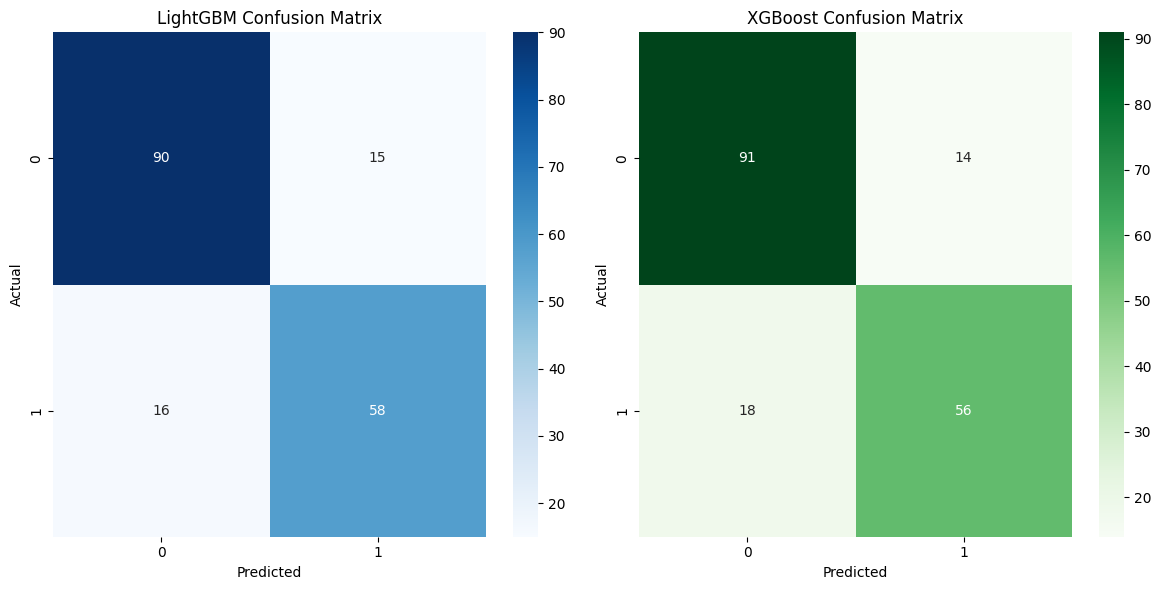

In [72]:
## Confusion matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_matrix(y_test, lgb_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title('LightGBM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

LightGBM:
- Accuracy: 82.68%
- Precision: 79.45%
- Recall: 78.38%
- F1 Score: 78.91%
Strength: Higher recall, faster training

XGBoost:
- Accuracy: 82.12%
- Precision: 80.00%
- Recall: 75.68%
- F1 Score: 77.78%
Strength: Higher precision, robust tuning options.
    
Conclusion:

LightGBM is better for recall-sensitive tasks (e.g., rescue operations).
XGBoost suits precision-critical scenarios (e.g., resource allocation).
Both models perform well; choice depends on task priorities. 